In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, firwin2, remez, freqz

In [81]:
def plot_filter_response(b, a, fs=1, title='Filtro', db=False):
    w, h = freqz(b, a, worN=8000)
    # plt.figure()
    if(db == False): plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')
    plt.title(title)

    if(db): plt.ylim(-120, 2*20*np.log10(h[0]))
    plt.xlabel('Norm Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid()
    # plt.show()

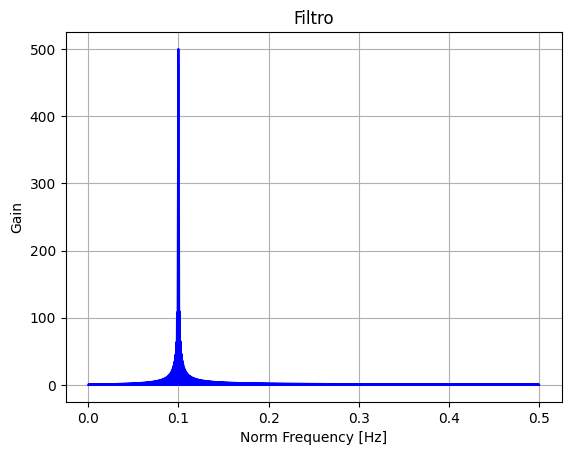

In [82]:
filter = firwin(11, 0.1)

sinal = np.cos(2*np.pi*0.1*np.arange(1000))

plot_filter_response(sinal, [1])

C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\transforms.py:2872: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: divide by zero encountered in log10
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')
C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: invalid value encountered in multiply
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')


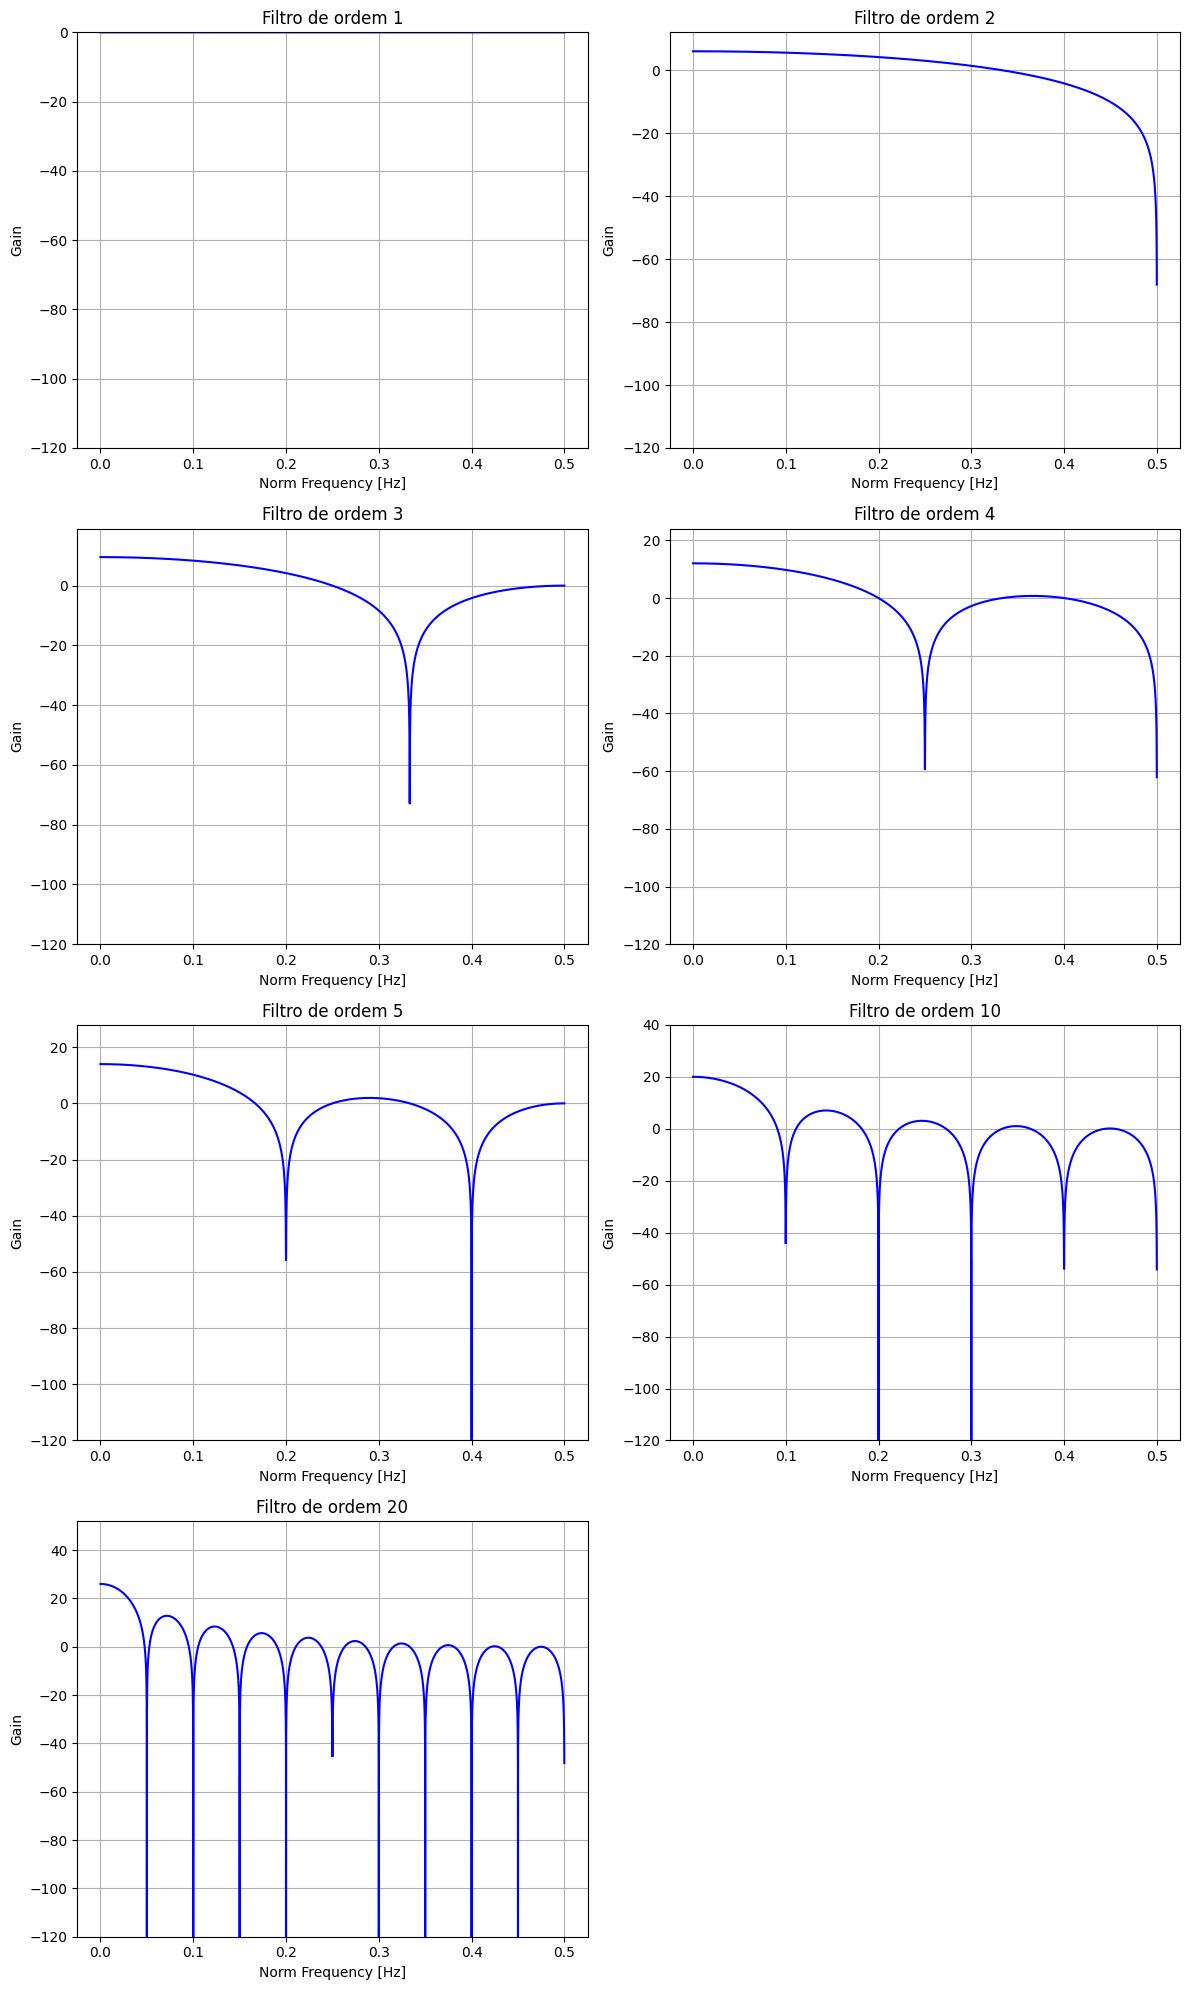

In [83]:
n_values = [1, 2, 3, 4, 5, 10, 20]

plt.figure(figsize=(12, 20))
# for n, iin n_values:
for i, n in enumerate(n_values):
    plt.subplot(len(n_values)//2 + 1, 2, i+1)
    filter = np.ones(n)
    plot_filter_response(filter, [1], title=f'Filtro de ordem {n}', db=True)

plt.tight_layout()

C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: divide by zero encountered in log10
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')
C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: invalid value encountered in multiply
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')


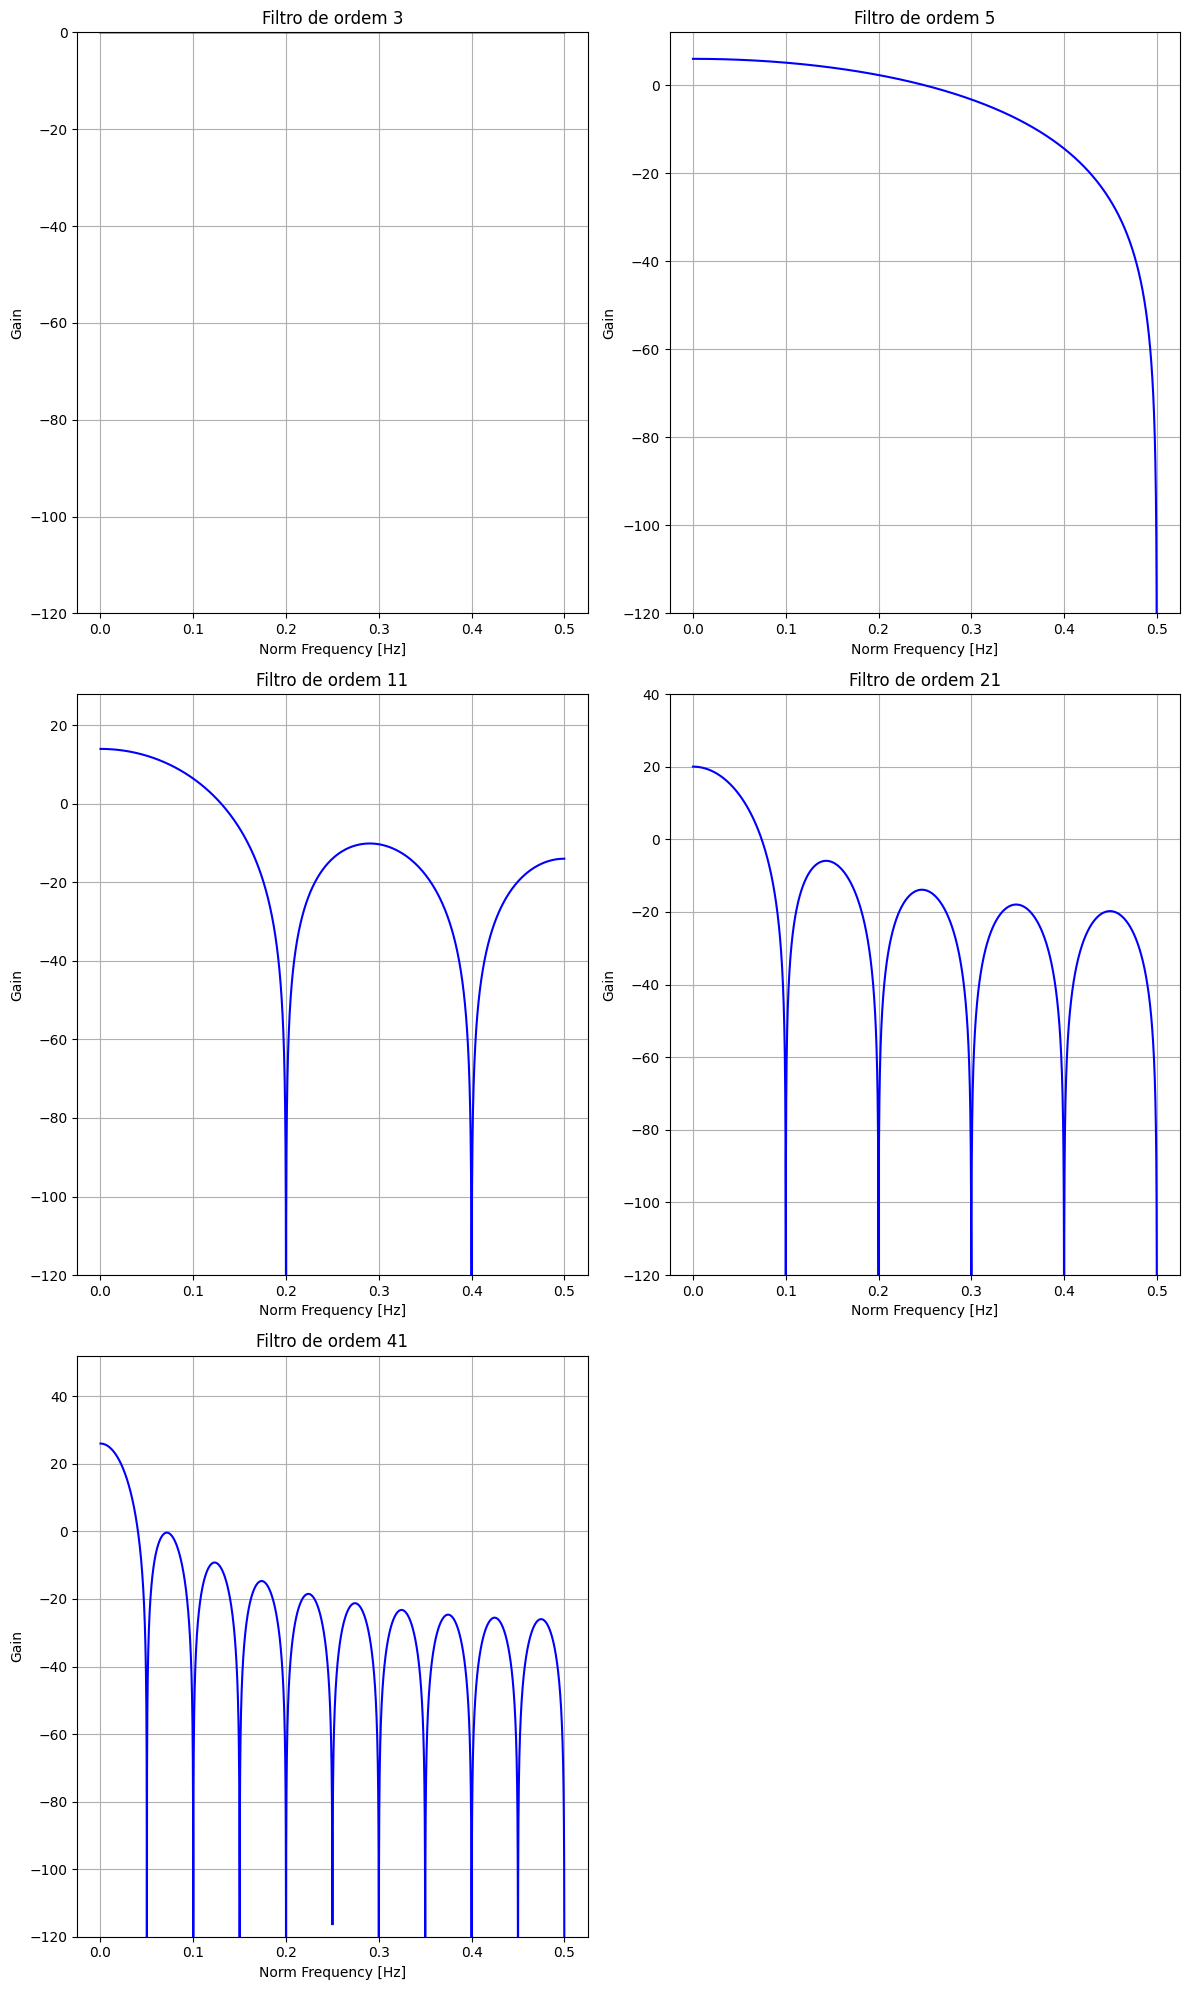

In [84]:
n_values = [3, 5, 11, 21, 41]

plt.figure(figsize=(12, 20))
# for n, iin n_values:
for i, n in enumerate(n_values):
    plt.subplot(len(n_values)//2 + 1, 2, i+1)
    filter = np.zeros(n)
    for j in range(n):
        if j <= (n-1)//2:
            filter[j] = 2*j/(n-1)
        else:
            filter[j] = 2 - 2*j/(n-1)
    plot_filter_response(filter, [1], title=f'Filtro de ordem {n}', db=True)

plt.tight_layout()

C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: divide by zero encountered in log10
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')
C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: invalid value encountered in multiply
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')


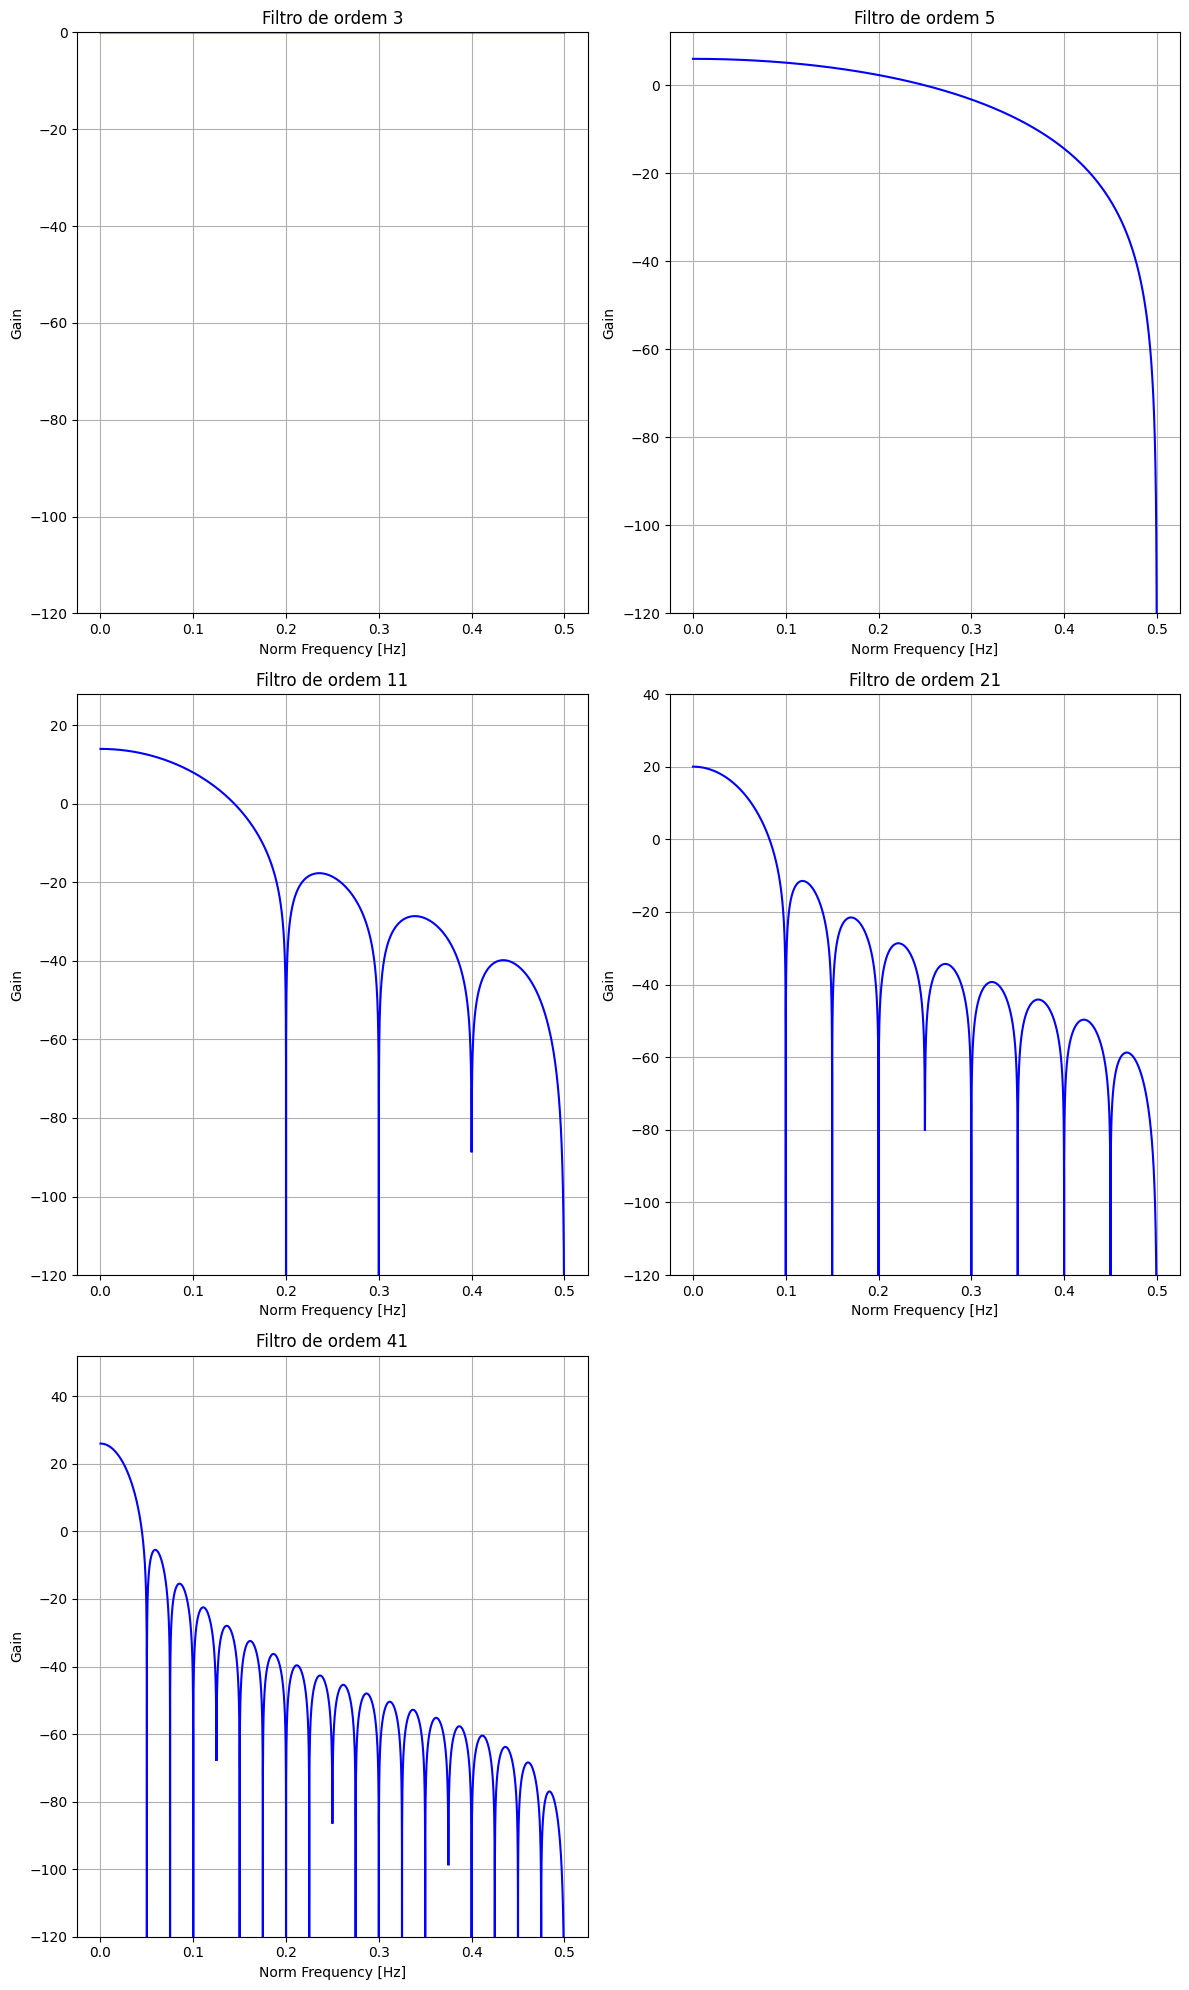

In [85]:
n_values = [3, 5, 11, 21, 41]

# Alternativa: np.hanning(n)

plt.figure(figsize=(12, 20))
# for n, iin n_values:
for i, n in enumerate(n_values):
    plt.subplot(len(n_values)//2 + 1, 2, i+1)
    filter = np.zeros(n)
    # Hanning
    filter = 0.5 - 0.5*np.cos(2*np.pi*np.arange(n)/(n-1))
    plot_filter_response(filter, [1], title=f'Filtro de ordem {n}', db=True)

plt.tight_layout()

C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: divide by zero encountered in log10
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')
C:\Users\Vitor\AppData\Local\Temp\ipykernel_23872\1360061813.py:5: RuntimeWarning: invalid value encountered in multiply
  else:   plt.plot(0.5*fs*w/np.pi, 20*np.log10(h), 'b')


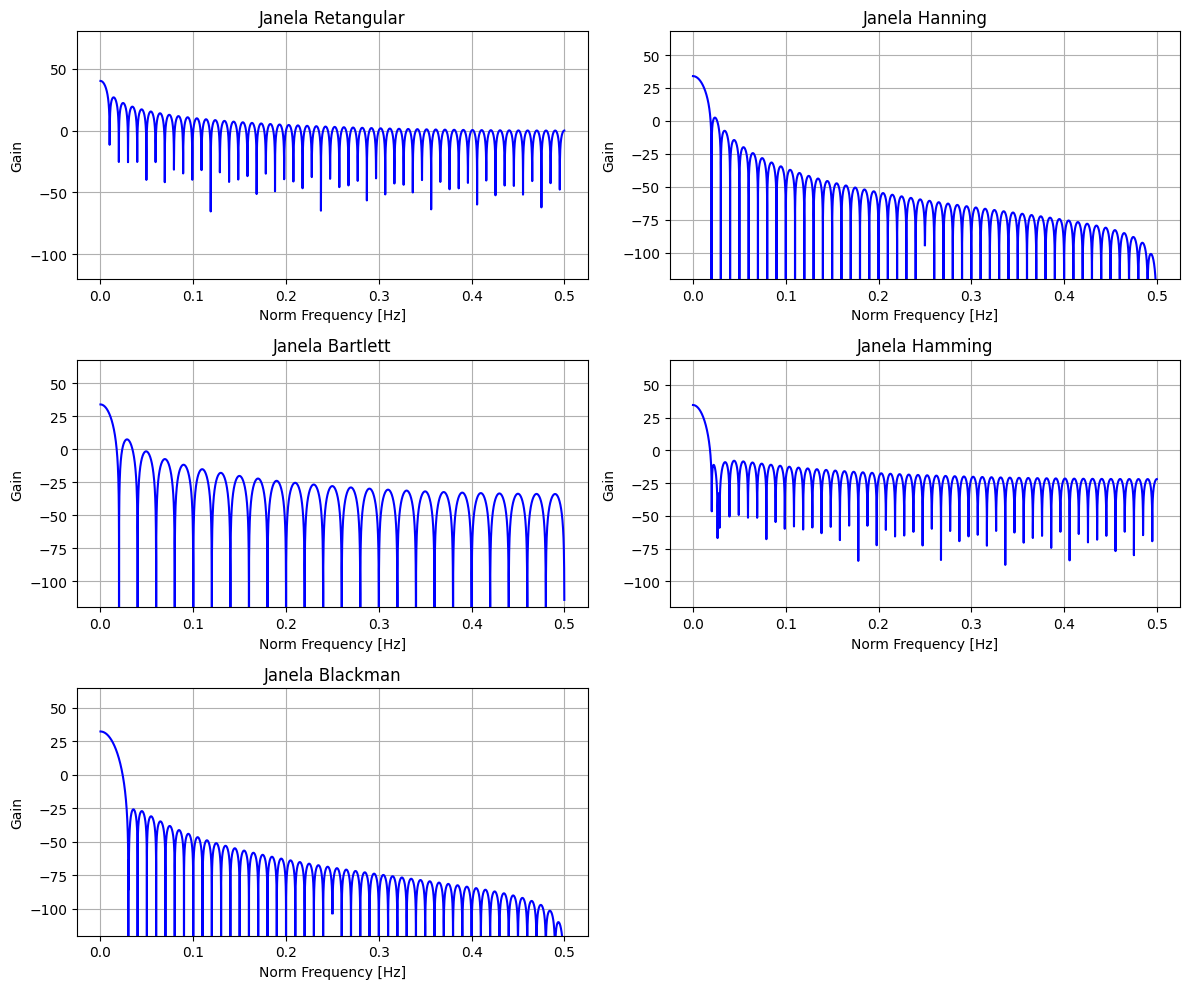

In [86]:
# Definindo o número de pontos
n_points = 101

# Criando as janelas
rectangular_window = np.ones(n_points)
hanning_window = np.hanning(n_points)
bartlett_window = np.bartlett(n_points)
hamming_window = np.hamming(n_points)
blackman_window = np.blackman(n_points)

# Plotando as respostas em frequência
plt.figure(figsize=(12, 10))

windows = {
    'Retangular': rectangular_window,
    'Hanning': hanning_window,
    'Bartlett': bartlett_window,
    'Hamming': hamming_window,
    'Blackman': blackman_window
}

for i, (name, window) in enumerate(windows.items()):
    plt.subplot(3, 2, i+1)
    plot_filter_response(window, [1], title=f'Janela {name}', db=True)

plt.tight_layout()
plt.show()